Data Loading

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img01 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab2/Input/Image 1.jpg')
img02 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab2/Input/Image 2.jpg')
img03 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab2/Input/Image 3.jpg')
img04 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab2/Input/Image 4.jpg')
img05 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab2/Input/Image 5.jpg')
img06 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab2/Input/Image 6.jpg')
img07 = cv2.imread('/content/drive/MyDrive/CSE463_LAB_I O/22299090_Md. Sybeen Abrar Prohor_Lab2/Input/Image 7.jpg')

# STEP 01


## TASK 01

In [3]:
#converting the main image to grayscale
img01 = cv2.cvtColor(img01, cv2.COLOR_BGR2GRAY)

In [4]:
#A simple kernel
simple_kernel = np.array([[0, 0, 0],
                          [0, 1, 0],
                          [0, 0, 0]])

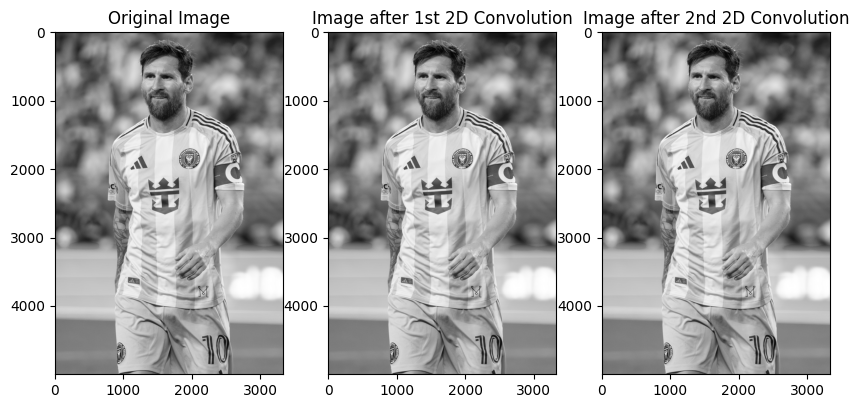

In [5]:
def gray_conv(image,kernel):
  return cv2.filter2D(image,-1,kernel)

img01_conv_01 = gray_conv(img01, simple_kernel)
img01_conv_02 = gray_conv(img01_conv_01, simple_kernel)


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img01, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Image after 1st 2D Convolution")
plt.imshow(img01_conv_01, cmap='gray')



plt.subplot(1, 3, 3)
plt.title("Image after 2nd 2D Convolution")
plt.imshow(img01_conv_02, cmap='gray')
plt.show()


The output is identical and no significant changes are noticable.


That's why I tried 2d convulation again on the convulated image and the result was the same as before.

## TASK 02

In [6]:
#converting to rgb
img02 = cv2.cvtColor(img02, cv2.COLOR_BGR2RGB)

In [7]:
# A sharpening kernel
sharpening_kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

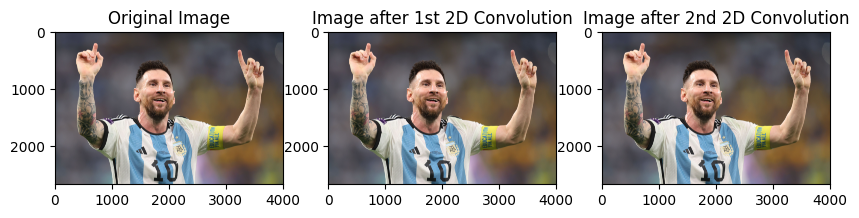

In [9]:
def sharp_conv(image,kernel):
  return cv2.filter2D(image,-1,kernel)

img02_conv_01 = sharp_conv(img02, simple_kernel)
img02_conv_02 = sharp_conv(img02_conv_01, simple_kernel)


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img02, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Image after 1st 2D Convolution")
plt.imshow(img02_conv_01, cmap='gray')



plt.subplot(1, 3, 3)
plt.title("Image after 2nd 2D Convolution")
plt.imshow(img02_conv_02, cmap='gray')
plt.show()


In this trial I tried to sharpen the image twice. In the first image it seemed identical but in the 2nd convoluation there is a slight sharpening noticable from the original image. I intentionally used a semi blurry image to notice any changes.

# STEP 02

## TASK 03

In [29]:
# convering to rgb
img03 = cv2.cvtColor(img03, cv2.COLOR_BGR2RGB)
#applying sharpening kernel
img03_sharp_conv = sharp_conv(img03, simple_kernel)

In [30]:
#applying paddings
pad_width = ((200, 200), (200, 200), (0, 0))
const_padded_img03 = np.pad(img03_sharp_conv, pad_width= pad_width, mode='constant')
reflect_padded_img03 = np.pad(img03_sharp_conv, pad_width=pad_width, mode='reflect')
edge_padded_img03 = np.pad(img03_sharp_conv, pad_width=pad_width, mode='edge')


In [27]:
print("Original shape:", img03.shape)
print("After padding:", const_padded_img03.shape)


Original shape: (1024, 1600, 3)
After padding: (1424, 2000, 3)


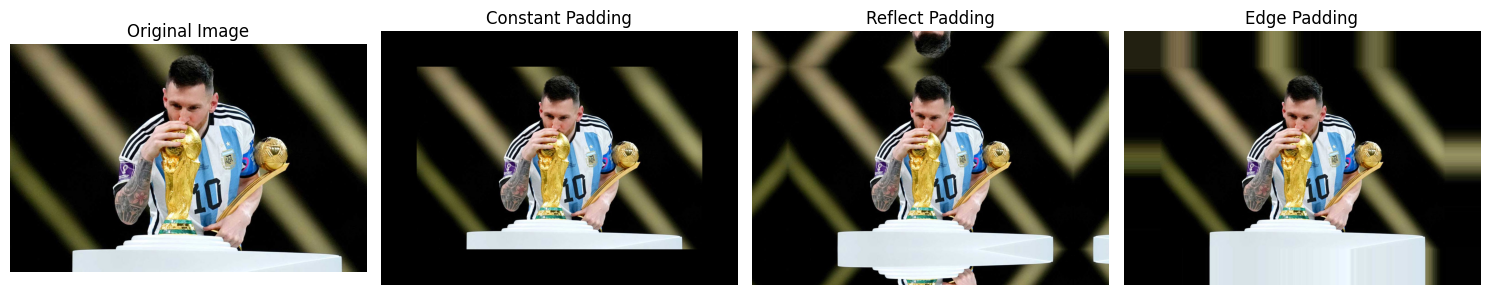

In [33]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(img03)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Constant Padding")
plt.imshow(const_padded_img03)
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Reflect Padding")
plt.imshow(reflect_padded_img03)
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Edge Padding")
plt.imshow(edge_padded_img03)
plt.axis("off")

plt.tight_layout()
plt.show()

# STEP 03

## TASK 04

In [47]:
#Load Image [4]
img04 = cv2.cvtColor(img04, cv2.COLOR_BGR2RGB)


In [48]:
def add_gaussian_noise(image, mean=0, sigma=25):
    noisy_image = image + np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    return noisy_image

#adding gausian noise
img04_g_noise = add_gaussian_noise(img04)

In [49]:
#Blurring the noisy image
blurred_image = cv2.blur(img04_g_noise, (5, 5))

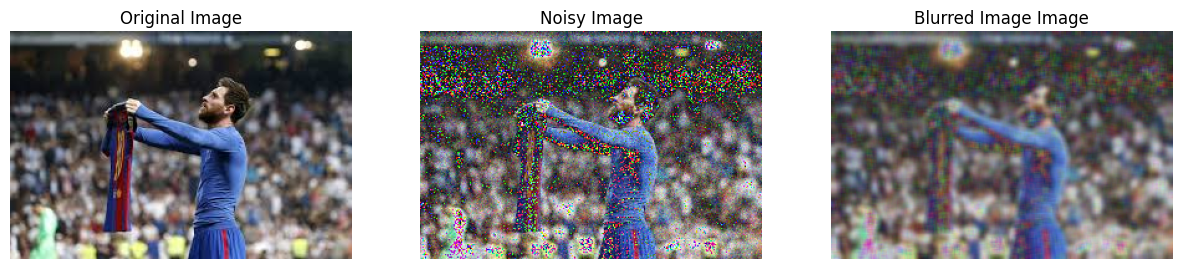

In [50]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img04)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Noisy Image')
plt.imshow(img04_g_noise)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Blurred Image Image')
plt.imshow(blurred_image)
plt.axis('off')

plt.show()

After adding the Gaussian Noise to the image it became noise and details are bit off but after adding the blur the noise seems to be less noticable than before.

## TASK 05

In [52]:
# applying gaussian blur to the noisy image by interchanging sigma values

#sigma = 0
g_blur_s1 = cv2.GaussianBlur(img04_g_noise, (5, 5), sigmaX=0)
#sigma = 1
g_blur_s2 = cv2.GaussianBlur(img04_g_noise, (5, 5), sigmaX=1)
#sigma = 2
g_blur_s3 = cv2.GaussianBlur(img04_g_noise, (5, 5), sigmaX=2)



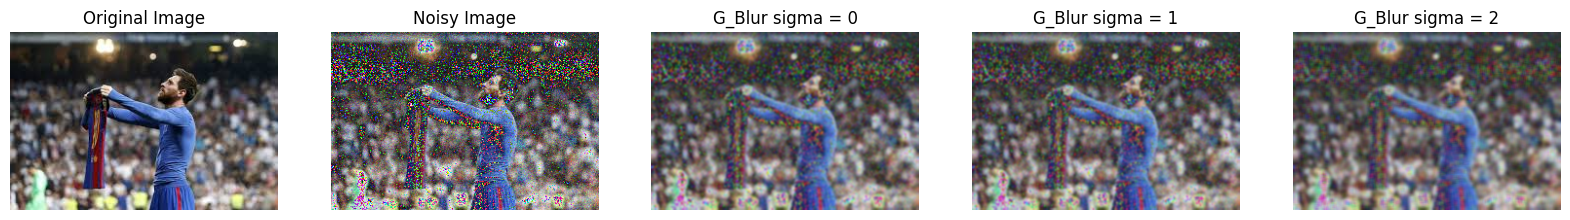

In [53]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(img04)
plt.axis('off')

plt.subplot(1, 5, 2)
plt.title('Noisy Image')
plt.imshow(img04_g_noise)
plt.axis('off')

plt.subplot(1, 5, 3)
plt.title('G_Blur sigma = 0')
plt.imshow(g_blur_s1)
plt.axis('off')

plt.subplot(1, 5, 4)
plt.title('G_Blur sigma = 1')
plt.imshow(g_blur_s2)
plt.axis('off')

plt.subplot(1, 5, 5)
plt.title('G_Blur sigma = 2')
plt.imshow(g_blur_s3)
plt.axis('off')

plt.show()

After every increament of the sigma value in Gassuian Blur the image becomes smooth but the noise outlines are still noticable. Where in normal blur the outline smoothens

# STEP 04

## TASK 06

In [54]:
img05 = cv2.cvtColor(img05,cv2.COLOR_BGR2GRAY)

In [55]:
# Applying Laplacian filter
laplacian_filtered_image = cv2.Laplacian(img05, cv2.CV_64F)
laplacian_filtered_image = cv2.convertScaleAbs(laplacian_filtered_image)

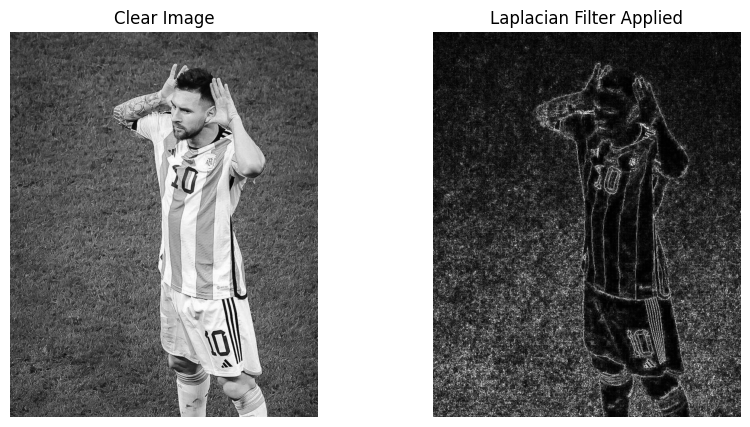

In [56]:
# Plotting the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img05, cmap='gray')
plt.title('Clear Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title('Laplacian Filter Applied')
plt.axis('off')

plt.show()

## TASK07

In [57]:
# loading gray scale image
img06 = cv2.cvtColor(img06,cv2.COLOR_BGR2GRAY)

In [59]:
#Defining vertical and horizontal kernels
vertical_kernel = np.array([[-1,0,1],
                            [-1,0,1],
                            [-1,0,1]], dtype=np.float32)

horizontal_kernel = np.array([[-1,-1,-1],
                              [0,0,0],
                              [1,1,1]], dtype=np.float32)

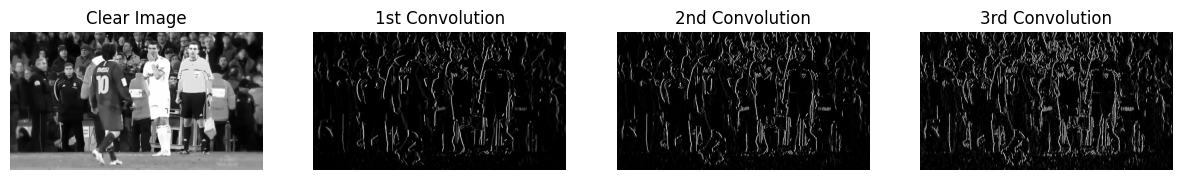

In [62]:
# Applying vertical kernel
first_vertical_conv = cv2.filter2D(img06,-1,vertical_kernel)
second_vertical_conv = cv2.filter2D(first_vertical_conv,-1,vertical_kernel)
third_vertical_conv = cv2.filter2D(second_vertical_conv,-1,vertical_kernel)

# Plotting the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img06, cmap='gray')
plt.title(f'Clear Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(first_vertical_conv, cmap='gray')
plt.title('1st Convolution')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(second_vertical_conv, cmap='gray')
plt.title('2nd Convolution')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(third_vertical_conv, cmap='gray')
plt.title(f'3rd Convolution')
plt.axis('off')

plt.show()

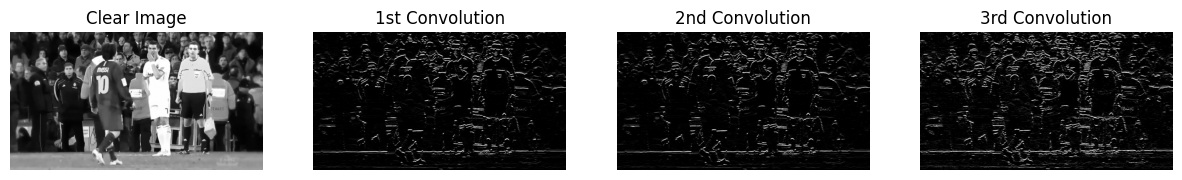

In [63]:
# Applying horizontal kernel
first_horizontal_conv = cv2.filter2D(img06,-1,horizontal_kernel)
second_horizontal_conv = cv2.filter2D(first_horizontal_conv,-1,horizontal_kernel)
third_horizontal_conv = cv2.filter2D(second_horizontal_conv,-1,horizontal_kernel)

# Plotting the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img06, cmap='gray')
plt.title(f'Clear Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(second_horizontal_conv, cmap='gray')
plt.title('1st Convolution')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(second_horizontal_conv, cmap='gray')
plt.title('2nd Convolution')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(third_horizontal_conv, cmap='gray')
plt.title(f'3rd Convolution')
plt.axis('off')

plt.show()

For this image vertical kernel worked better than horizontal kernel. Vertical kernels helped to identify vertical edges where horizontal kernels helped to to identify horizontal edges.  
Vertical edges highlighted more of the details of the image.

# STEP 05

## TASK 8.1

In [69]:
#loading gray scale image
img07 = cv2.cvtColor(img07, cv2.COLOR_BGR2GRAY)

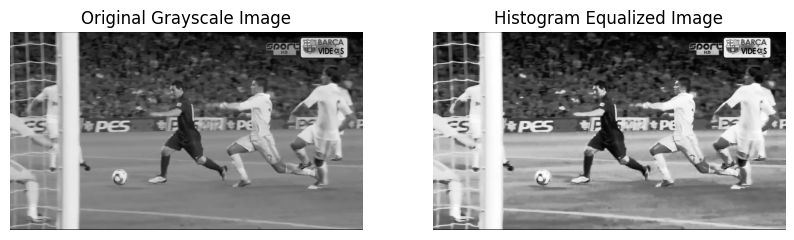

In [70]:
# Applying Histogram Equalization
equalized_image = cv2.equalizeHist(img07)

# Plotting the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img07, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()

Lighter and Darker part becomes more visible creating a high contrast effect

## TASK 8.2

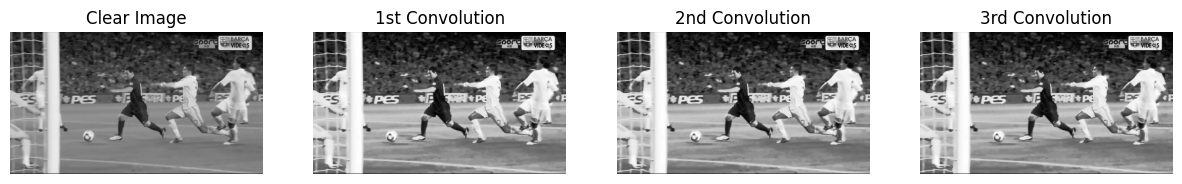

In [72]:
# Applying Histogram Equalization multiple times
first_equalization = cv2.equalizeHist(img07)
second_equalization = cv2.equalizeHist(first_equalization)
third_equalization = cv2.equalizeHist(second_equalization)


# Plotting the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img07, cmap='gray')
plt.title(f'Clear Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(first_equalization, cmap='gray')
plt.title('1st Convolution')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(second_equalization, cmap='gray')
plt.title('2nd Convolution')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(third_equalization, cmap='gray')
plt.title(f'3rd Convolution')
plt.axis('off')

plt.show()

The effect histogram equalization for this image on the first time is noticable but as the 2nd and 3rd convulation are done, the difference aren't as much as noticable than before.